In [2]:
%matplotlib inline

import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import sys

from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split as tts
from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer
from scipy import stats
from sklearn.linear_model import ElasticNet

In [3]:
data = pd.read_csv ('pickles.csv')

In [5]:
data.head()

,Unnamed: 0,_id,restaurant_name,address_full,business_id,review_count,inspection_date,stars,latitude,longitude,...,neighborhood4,neighborhood5,neighborhood6,PreviousViolations,DiffPreviousTwo,from_date,thru_date,violations_y,string_agg,predictions
0,0,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,2009-07-13,4.0,42.35377,-71.137418,...,0,0,0,8,0,2008-08-18,2009-07-12,8.0,I was VERY skeptical about ever trying Grassho...,25
1,1,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,2009-07-27,4.0,42.35377,-71.137418,...,0,0,0,4,0,2009-07-13,2009-07-26,4.0,"I had a delicious lo mien beef. Large portion,...",25
2,2,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,2010-06-03,4.0,42.35377,-71.137418,...,0,0,0,4,0,2009-07-27,2010-06-02,4.0,"Great spot. It was very crowded, the menu is ...",20
3,3,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,2011-03-08,4.0,42.35377,-71.137418,...,0,0,0,12,0,2010-06-04,2011-03-07,12.0,Great service and generous portion sizes for l...,10
4,4,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,2011-06-16,4.0,42.35377,-71.137418,...,0,0,0,1,0,2011-03-08,2011-06-15,1.0,I've been going to Grasshopper for years.\n\nV...,25


In [6]:
#scaling continuous independent variables, with mean zero
sdf = data.copy()
scaled = np.array(sdf[['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo', 'predictions']])
scaled = preprocessing.scale(scaled)
# scaled.shape
final = pd.DataFrame(data = scaled,
                     columns =['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo', 'predictions'])

delist = ['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo', 'predictions']
ndf = data.copy()
for i in delist:
    del ndf[i]
# ndf.shape
df = pd.concat([final, ndf], axis=1)

df.shape

(18879, 74)

In [7]:
variables = df[['PreviousViolations','DiffPreviousTwo','IsAsian','IsFrench','IsSandwiches',
                 'IsFastFood','IsBurgers','IsItalian','IsHawaiian','IsSouthern','IsMexican','IsLatinAmerican','IsMiddleEastern',
                 'IsGreek','IsAmerican','IsDonuts','IsIndian','IsSeafood','IsDesserts','IsSalad','Pizza','IsBuffets',
                 'IsSushiBars','IsDelis','IsSports Bars','IsBakeries','IsPubs','IsCaterers','IsDiners','IsCafes','IsBars',
                 'alcohol','delivery','dogsallowed','smoking','goodforkids','outdoorseating','waiterservice','creditcards',
                 'pricerange','drivethru','tourist','classy','hipster','latenight','upscale','divey','Boston','Charlotte',
                 'LasVegas','neighborhood0','neighborhood1','neighborhood2','neighborhood3','neighborhood4','neighborhood5',
                 'neighborhood6', 'predictions']]
target = df['violations_y']
variables.shape
print(target.shape, variables.shape)

(18879,) (18879, 58)


In [8]:
#Train test splits
splits = cv.train_test_split(variables, target, test_size=0.083)
X_train, X_test, y_train, y_test = splits

Linear Regression model
Mean Squared Error: 17.194
Coefficient of Determination: 0.719


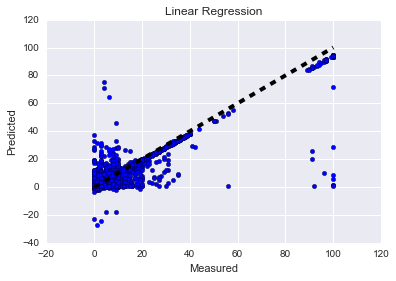

In [9]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predict = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predict))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predict))

# cross_val_predict returns an array of size target with cross validated predictions
predicted = cross_val_predict(model, variables, target, cv=12)

#Plot measured vs. predicted values
fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

In [10]:
# #Remove outliers that have high violation (> 4 standard deviations)
o = data.copy()
odf = o[((o.violations_y - o.violations_y.mean()) / o.violations_y.std()).abs() < 4]
odf.shape

(18759, 74)

In [11]:
#Select variables and target for cross validation
variables = odf[['PreviousViolations','DiffPreviousTwo','IsAsian','IsFrench','IsSandwiches',
                 'IsFastFood','IsBurgers','IsItalian','IsHawaiian','IsSouthern','IsMexican','IsLatinAmerican','IsMiddleEastern',
                 'IsGreek','IsAmerican','IsDonuts','IsIndian','IsSeafood','IsDesserts','IsSalad','Pizza','IsBuffets',
                 'IsSushiBars','IsDelis','IsSports Bars','IsBakeries','IsPubs','IsCaterers','IsDiners','IsCafes','IsBars',
                 'alcohol','delivery','dogsallowed','smoking','goodforkids','outdoorseating','waiterservice','creditcards',
                 'pricerange','drivethru','tourist','classy','hipster','latenight','upscale','divey','Boston','Charlotte',
                 'LasVegas','neighborhood0','neighborhood1','neighborhood2','neighborhood3','neighborhood4','neighborhood5',
                 'neighborhood6', 'predictions']]
target = odf['violations_y']
print('variables:', variables.shape, 'target:', target.shape)

variables: (18759, 58) target: (18759,)


In [12]:
#Train test splits
splits = cv.train_test_split(variables, target, test_size=0.83)
X_train, X_test, y_train, y_test = splits

Linear Regression model
Mean Squared Error: 6.169
Coefficient of Determination: 0.768


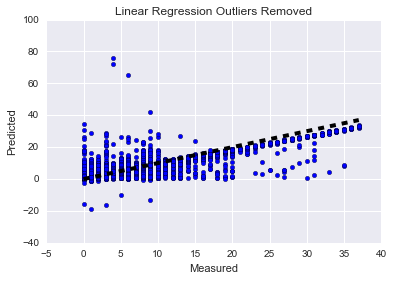

In [13]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predict = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predict))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predict))

# cross_val_predict returns an array of the size target with cross validated predictions
predicted = cross_val_predict(model, variables, target, cv=12)

#Plot measured vs. predicted values
fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Linear Regression Outliers Removed')
plt.show()

Random Forest model
Mean squared error = 6.326
R2 score = 0.762


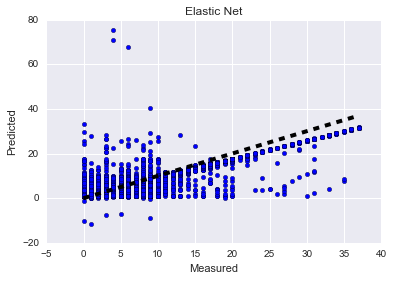

In [14]:
model = ElasticNet()
model.fit(X_train, y_train)

expected = y_test
predict = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predict))
print("R2 score = %0.3f" % r2_score(expected, predict))

# cross_val_predict returns an array of the size target with cross validated predictions
predicted = cross_val_predict(model, variables, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Elastic Net')
plt.show()

Random Forest model
Mean squared error = 5.543
R2 score = 0.792


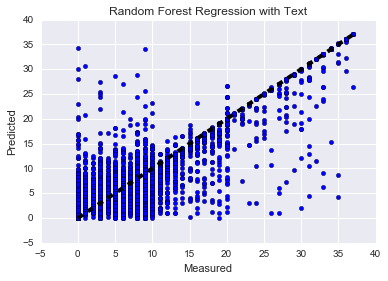

In [15]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predict = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predict))
print("R2 score = %0.3f" % r2_score(expected, predict))

# cross_val_predict returns an array of the size target with cross validated predictions
predicted = cross_val_predict(model, variables, target, cv=12)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Random Forest Regression with Text')
plt.show()